In [1]:
# NOTE: We've done some calculations and data manipulation for you, 
# jump down to the "CODE CHALLENGE" or feel free to play with the calculations.

In [2]:
# IMPORTANT: must add the "%matplotlib notebook" for notebook's matplotlib graphs.
%matplotlib notebook

In [3]:
# Import Numpy, matplotlib, pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load in the csv from Resources folder as school_data_df.
school_data_df = pd.read_csv("Resources/cwurData.csv")

# Show the first 5 rows of school_data_df
school_data_df.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [5]:
# Declare a variable called institution_df 
    # Set it with the group of institution and average all numbers
    # Hint: When grouping, use as_index=False to retain column names.
institution_df = school_data_df.groupby("institution", as_index=False).mean()

# Removing year column.
institution_df = institution_df.drop("year", axis=1)

# Show the first 8 row of institution_df
institution_df.head(8)

,institution,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,AGH University of Science and Technology,717.5,3.5,262.0,238.0,214.0,715.0,886.0,560.0,902.5,475.0,44.485
1,Aalborg University,579.0,5.0,361.0,411.5,214.0,601.0,646.5,325.0,531.5,413.5,44.710
2,Aalto University,406.5,4.0,361.0,237.5,214.0,340.0,418.5,627.0,442.0,192.0,45.340
3,Aarhus University,120.5,2.0,301.0,176.5,106.5,90.5,79.5,91.0,92.5,174.0,49.910
4,Aberystwyth University,807.0,59.0,361.0,522.5,214.0,830.0,557.0,502.0,735.0,544.0,44.375
5,Adam Mickiewicz University in Poznań,884.0,5.0,191.5,522.5,214.0,670.0,768.5,806.0,914.5,569.0,44.280
6,Ain Shams University,965.0,3.0,361.0,522.5,214.0,883.0,840.0,560.0,934.5,804.0,44.185
7,Aix-Marseille University,215.0,9.0,219.0,461.5,214.0,124.0,85.0,179.0,206.0,228.5,47.395


In [6]:
# Declare a variable called top_avg_sorted_df 
    # Sort institution_avg_score_df by national_rank from Lowest to Highest.
    # then save only the top 10 rows
top_avg_sorted_df = institution_df.sort_values("national_rank", ascending=True)

# Show the rows of top_avg_sorted_df
top_avg_sorted_df.head()

,institution,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
597,University of Barcelona,118.0,1.0,361.0,216.5,214.0,62.0,107.5,87.0,85.5,237.0,49.980
863,"University of Science, Malaysia",398.5,1.0,361.0,522.5,214.0,684.5,882.5,518.5,814.0,68.0,45.535
264,King Saud University,494.5,1.0,361.0,157.5,214.0,585.5,538.0,722.5,867.0,173.5,45.020
839,University of Puerto Rico at Mayagüez,969.5,1.0,361.0,522.5,214.0,998.5,785.5,627.0,938.5,804.0,44.175
498,Sofia University,835.5,1.0,244.0,522.5,214.0,806.0,877.5,525.5,807.5,804.0,44.335


In [7]:
# Set a new variable "top2_avg_sorted_df", keep all rows if their average national_rank is less than or equal to 2.
top2_avg_sorted_df = top_avg_sorted_df[top_avg_sorted_df['national_rank'] <= 2]

top2_avg_sorted_df.head()

,institution,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
597,University of Barcelona,118.0,1.0,361.0,216.5,214.0,62.0,107.5,87.0,85.5,237.0,49.980
863,"University of Science, Malaysia",398.5,1.0,361.0,522.5,214.0,684.5,882.5,518.5,814.0,68.0,45.535
264,King Saud University,494.5,1.0,361.0,157.5,214.0,585.5,538.0,722.5,867.0,173.5,45.020
839,University of Puerto Rico at Mayagüez,969.5,1.0,361.0,522.5,214.0,998.5,785.5,627.0,938.5,804.0,44.175
498,Sofia University,835.5,1.0,244.0,522.5,214.0,806.0,877.5,525.5,807.5,804.0,44.335


In [8]:
# Set a variable "merge_table" and merge the dataframes top2_avg_sorted_df and school_data_df using an outer join.
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.merge.html#pandas.merge
merge_table = pd.merge(top2_avg_sorted_df, school_data_df[["institution","country"]], on=["institution"]).drop_duplicates()
merge_table.head()

,institution,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,country
0,University of Barcelona,118.0,1.0,361.0,216.5,214.0,62.0,107.5,87.0,85.5,237.0,49.980,Spain
2,"University of Science, Malaysia",398.5,1.0,361.0,522.5,214.0,684.5,882.5,518.5,814.0,68.0,45.535,Malaysia
4,King Saud University,494.5,1.0,361.0,157.5,214.0,585.5,538.0,722.5,867.0,173.5,45.020,Saudi Arabia
6,University of Puerto Rico at Mayagüez,969.5,1.0,361.0,522.5,214.0,998.5,785.5,627.0,938.5,804.0,44.175,Puerto Rico
8,Sofia University,835.5,1.0,244.0,522.5,214.0,806.0,877.5,525.5,807.5,804.0,44.335,Bulgaria


# CODE CHALLENGE

<IPython.core.display.Javascript object>


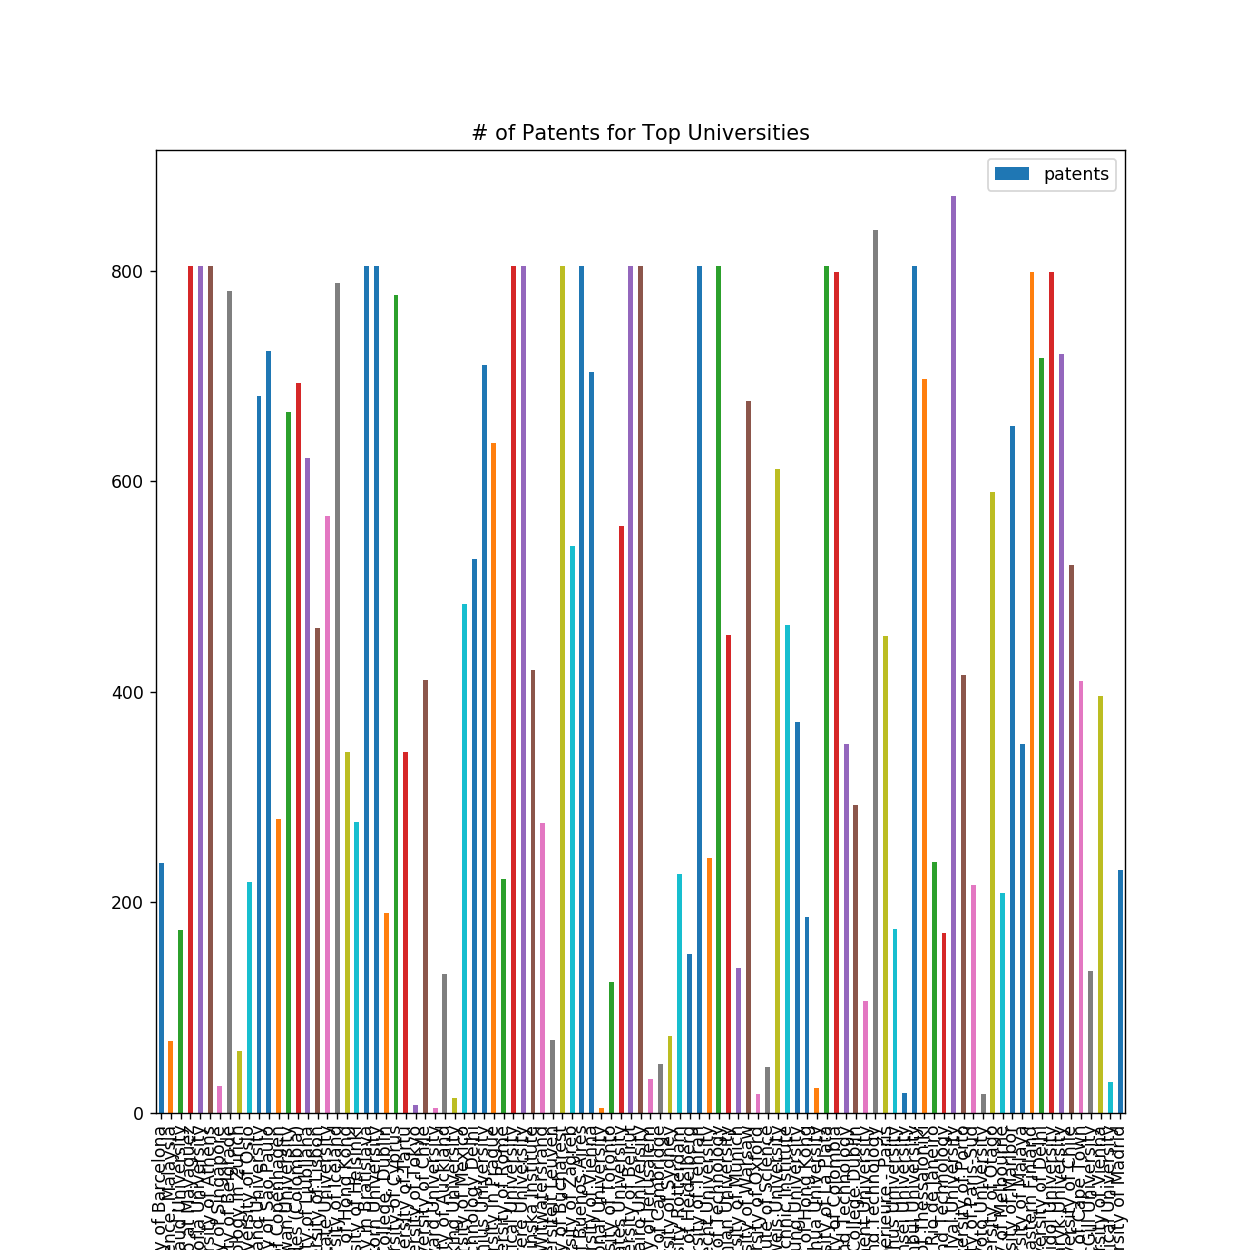

In [9]:
# Make a new code box and fix this graph to be more legible and useful as a presentation.
my_graph = merge_table.plot(kind="bar", x="institution", y="patents", figsize=(10,10), title = "# of Patents for Top Universities")

plt.savefig("images/bad_graph.png")
plt.show()

<IPython.core.display.Javascript object>


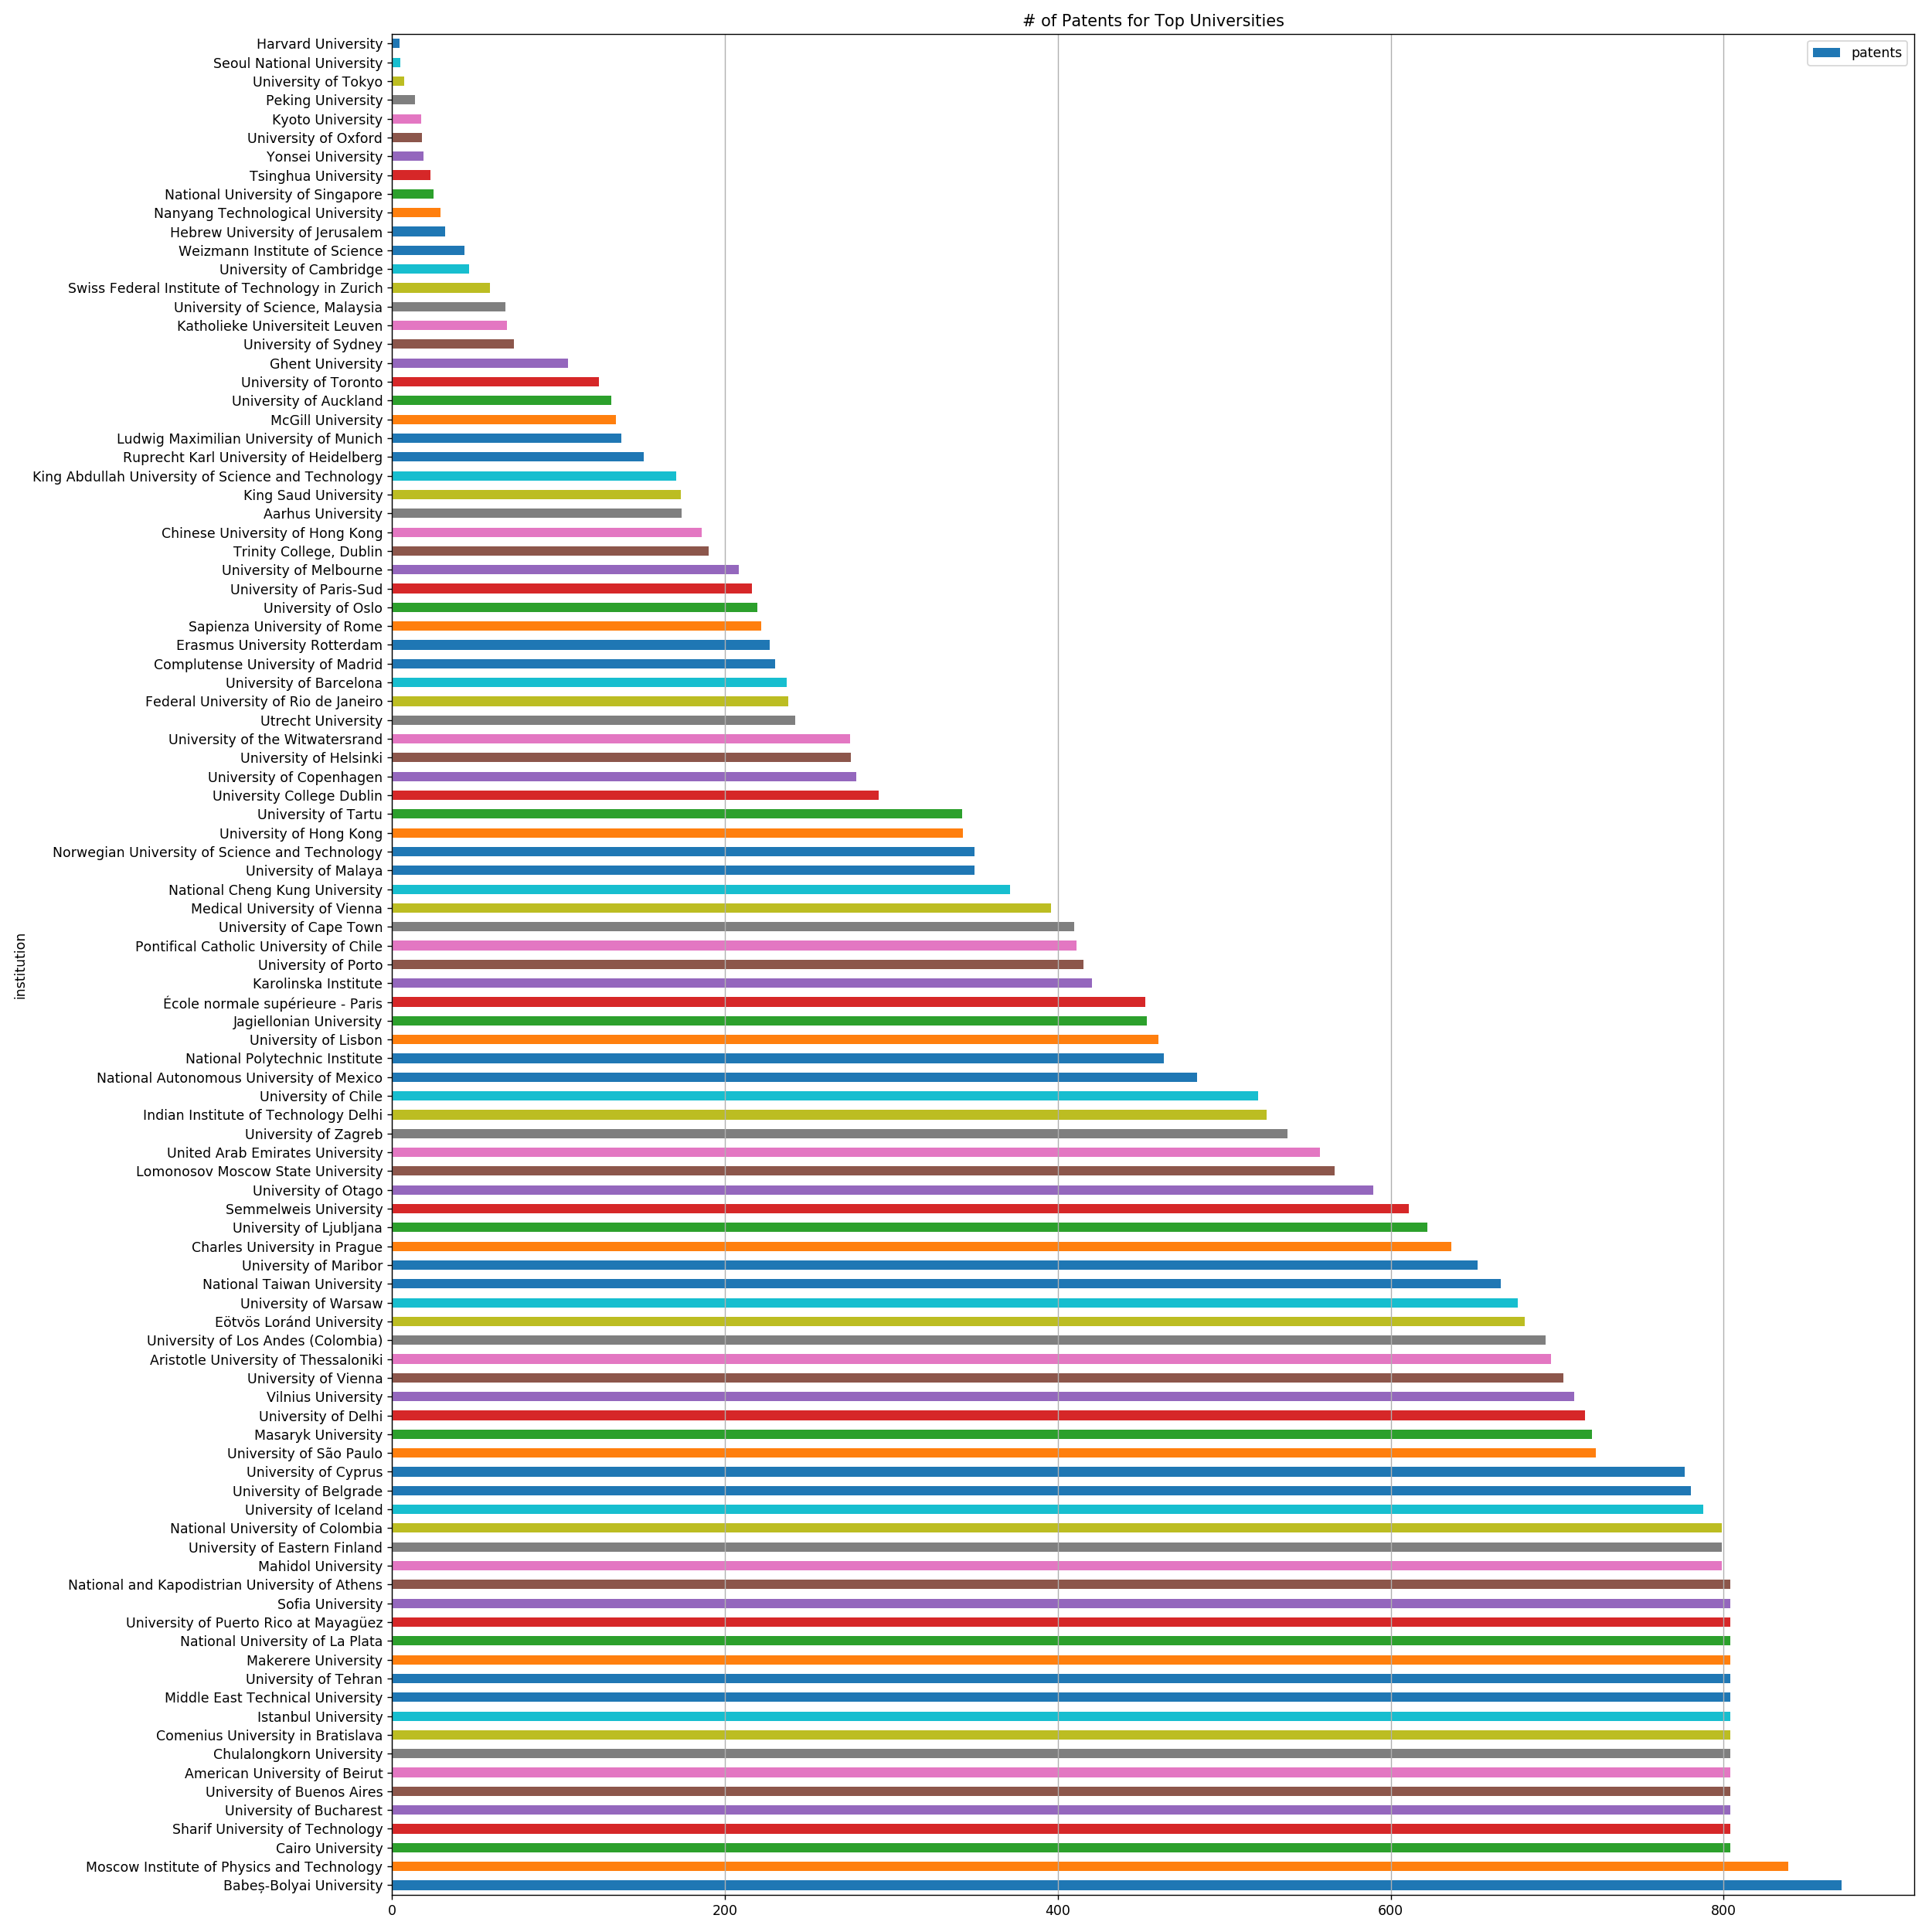

In [10]:
merge_table = merge_table.sort_values("patents", ascending=False)

# Make the graph prettier and easily read.
my_graph = merge_table.plot(kind="barh", x="institution", y="patents", figsize=(20,20), title = "# of Patents for Top Universities")
my_graph.xaxis.grid()

# Don't forget to save the graph into our images folder.
plt.tight_layout()
plt.savefig("images/pretty_graph.png")
plt.show()